# A Safety Oriented Look at Pittsburgh Neighborhoods

When moving into a neighborhood in Pittsburgh there are a few main things that you want to take into account. Cost, location, and safety. Through this notebook we take a look at the safety of neighborhoods via examining the number of speedhumps that are located within and the frequency of crime and fire incidents. All of these factors will determine which neighborhood we are least likely to bite the dust in.

## Importing Our Data

First thing we have to do is import our data into three separate variables so that we can later turn them into dictionaries and then into dataframes. We also define a function here that we'll use later to make some pretty graphs so that even numpties know where to go for the safeest experience... on second thought, maybe we shouldn't tell them where to go.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager

def metaGraph(label):
    title = label + " Per Neighborhood in Pittsburgh, PA"
    plt.ylabel(label, fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.xlabel("Neighborhood", fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.title(title, fontweight="bold", fontname="PT Serif", fontsize=15)

#loads in all three datasets
fires = pd.read_csv("data/fires.csv")
chip = pd.read_csv("data/CrimeRate.csv")
humps = pd.read_csv("data/speedhumps.csv")


## Data to Dictionary

Now that we have all our data we need to turn them into dictionaries so that we can get some graphs from their dataframes later. While doing this, we realize that not all databases are created equally and thus limit our later two datasets to only include neighborhoods that exist within our smallest database, Humps Per Hood.

In [2]:
#creates dictionaries for each metric

#humps dictionary
hph = {}
hoods = []
nums = []

for index, row in humps.iterrows():
    hood = row["neighborhood"]
    if hood in hph:
        hph[hood] += 1
    else:
        hph[hood] = 1
        
for i in hph:
    hoods.append(i)
    nums.append(hph[i])
    
hph = {"Neighborhood":hoods, "Humps":nums}


#fires dictionary
fire_count = {}

for index, row in fires.iterrows():
    neighborhood = row['neighborhood']
    if neighborhood in fire_count:
        fire_count[neighborhood] += 1
    elif neighborhood not in fire_count and neighborhood != None and neighborhood in hoods:
        fire_count[neighborhood] = 1

#crime dictionary
crime_dict = {}
dict_count = {}
for index, row in chip.iterrows():
    cur_hood = row['INCIDENTNEIGHBORHOOD']
    if cur_hood in crime_dict:
        crime_dict[cur_hood] = crime_dict.get(cur_hood) + row['HIERARCHY']
        dict_count[cur_hood] = dict_count.get(cur_hood) + 1
    elif cur_hood not in crime_dict and cur_hood in hoods:
        crime_dict[cur_hood] = row['HIERARCHY']
        dict_count[cur_hood] = 1
        
mean = {}
for (k,v), (k2,v2) in zip(crime_dict.items(), dict_count.items()):
     mean[k] = v/v2



## Dictionary to Dataframe

Now that we have dictionaries we need dataframes for graphing. This is easy enough, or it would be if we had generated some nicer dictionaries, sadly we live in a cruel cruel world and have to append some extra code so that all of our dataframes have the same levels of information.

In [3]:
#turns our dictionaries into dataframes for easier manipulation

#fires dataframe
graph = pd.DataFrame.from_dict(fire_count, orient='index', dtype = None, columns=None)
graph = graph.iloc[1: , :]
#Fixing the indexing and column names
graph.reset_index(inplace=True)
graph = graph.rename(columns = {'index':'Neighborhood', 0:'Fire Incidents'})

#crime dataframes
count_df = pd.DataFrame.from_dict(dict_count, orient = 'index')
mean_dataframe = pd.DataFrame.from_dict(mean, orient = 'index')
#Fixing the indexing and column names
count_df.reset_index(inplace=True)
count_df = count_df.rename(columns = {'index':'Neighborhood', 0:'Crime Incidents'})

#humps dataframe
graphHumps = pd.DataFrame.from_dict(hph)

## Dataframe to Graphs

Now we have our nice dataframes and we can just throw them through some functions to get pretty graphs. On their own this tells us really little, especially since higher numbers mean better in some locations, and worse in others. Let's do something about this.  

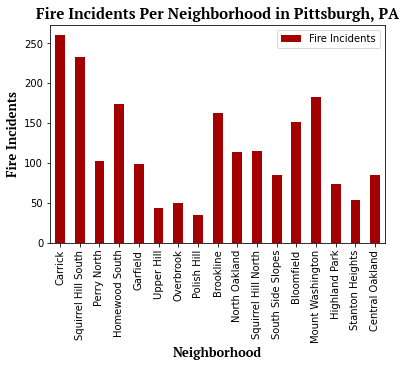

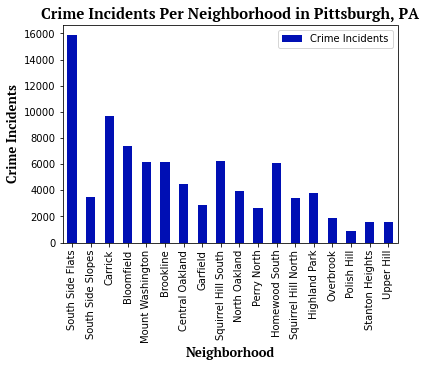

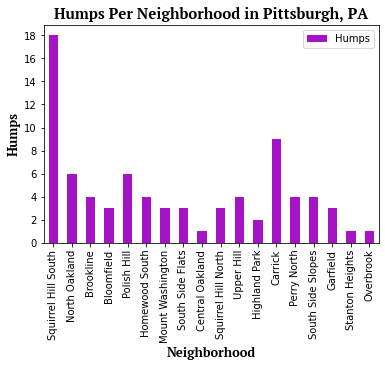

In [4]:
#Now let's get some pretty graphs out
graph.plot.bar(color="#A50000",  x="Neighborhood", y="Fire Incidents")
metaGraph("Fire Incidents")

count_df.plot.bar(color="#000FB4", x="Neighborhood", y="Crime Incidents")
metaGraph("Crime Incidents")

graphHumps.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
plt.yticks([0,2,4,6,8,10,12,14,16,18,])
metaGraph("Humps")

## Sorted Graphs

Now let's sort our graphs in accordance with their metric. So for our first two graphs, lower means better, so we're going to assort them ascending, but for our last graph, higher means better, and so we sort it descending. Still, we don't see a clear winner, so we have to do some cool math.

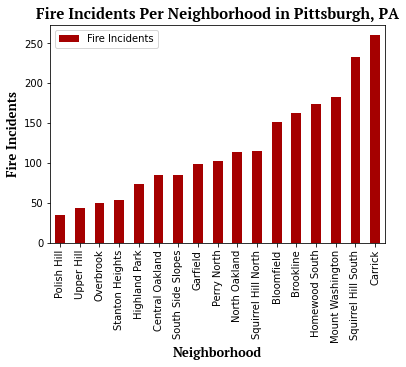

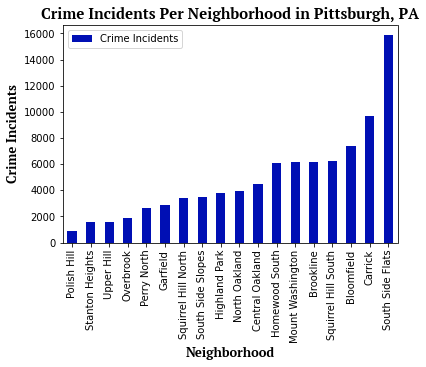

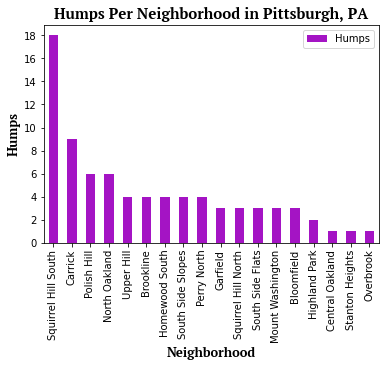

In [5]:
#We do a little sorting
graphSorted = graph.sort_values("Fire Incidents", ascending=True)
count_df_sorted = count_df.sort_values("Crime Incidents", ascending=True)
graphHumpsSorted = graphHumps.sort_values("Humps", ascending=False)

#More pretty graphs
graphSorted.plot.bar(color="#A50000",  x="Neighborhood", y="Fire Incidents")
metaGraph("Fire Incidents")

count_df_sorted.plot.bar(color="#000FB4", x="Neighborhood", y="Crime Incidents")
metaGraph("Crime Incidents")

graphHumpsSorted.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
plt.yticks([0,2,4,6,8,10,12,14,16,18,])
metaGraph("Humps")

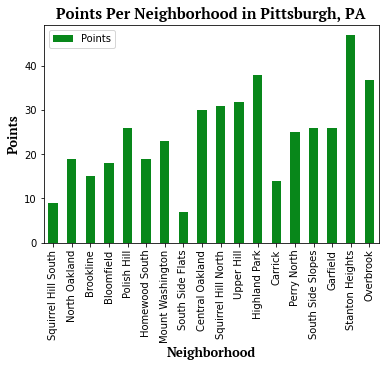

In [6]:
points = [0] * len(hoods)

for i in range(0, len(graphSorted["Neighborhood"])):
    k = hoods.index(graphSorted["Neighborhood"].loc[i])
    points[k] += i
    
for i in range(0, len(count_df_sorted["Neighborhood"])):
    k = hoods.index(count_df_sorted["Neighborhood"].loc[i])
    points[k] += i
    
for i in range(0, len(graphHumpsSorted["Neighborhood"])):
    k = hoods.index(graphHumpsSorted["Neighborhood"].loc[i])
    points[k] += i

pointsDict = {"Neighborhood":hoods, "Points":points}
pointsDF = pd.DataFrame.from_dict(pointsDict)

pointsDF.plot.bar(color="#08871A",  x="Neighborhood", y="Points")
metaGraph("Points")

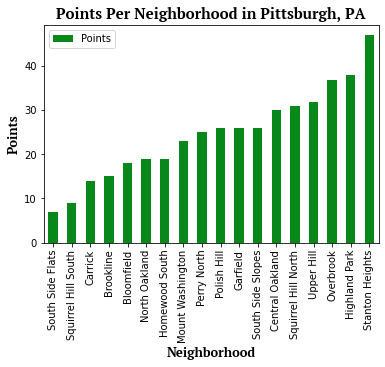

In [7]:
pointsDFSorted = pointsDF.sort_values("Points", ascending=True)

pointsDFSorted.plot.bar(color="#08871A",  x="Neighborhood", y="Points")
metaGraph("Points")